# Comparison of ERA5 and IMD Daily Temperature Extremes Across Maharashtra (2024)

In this notebook, we analyze and compare **daily temperature extremes patterns** across Maharashtra using two key datasets:
- ERA5: Climate reanalysis data from ECMWF
- IMD: Gridded daily temperature extremes from the Indian Meteorological Department

We focus on:
- Harmonizing ERA5 and IMD temperature data
- Evaluating the **correlation between ERA5 and IMD temperature extremes** at each grid point
- Visualizing the **spatial pattern of Pearson correlations** to assess agreement between datasets

We use:
- `varunayan` for extracting ERA5 hourly minimum and maximum temperatures
- `imdlib` for accessing IMD daily tmin and tmax data

This study provides insights into how well ERA5 captures regional temperature extremes in Maharashtra compared to IMD observations, which could be important for validating ERA5 use in climate research and studies for Maharashtra.

## Step 1: Extract ERA5 Temperature Extremes Data for Maharashtra

We use `varunayan` to download **hourly minimum and maximum temperature (`mn2t` and `mx2t`)** from the ERA5 climate reanalysis dataset for the Maharashtra region, covering the year **2024**.

* **North:** 21.5°, **South:** 15.5°, **East:** 80.5°, **West:** 72.5°
* **Resolution:** 1°
* **Frequency:** hourly
* **Units:** Kelvin

We will be using the raw data acquired using `varunayan` for this analysis.

In [33]:
import varunayan

varunayan.era5ify_bbox(
    request_id='min_max_temp_maha_2020',
    variables=['maximum_2m_temperature_since_previous_post_processing', 'minimum_2m_temperature_since_previous_post_processing'],
    start_date='2020-1-1',
    end_date='2020-12-31',
    north=21.5,
    south=15.5,
    east=80.5,
    west=72.5,
    resolution=1,
)


STARTING ERA5 SINGLE LEVEL PROCESSING
Request ID: min_max_temp_maha_2020
Variables: ['maximum_2m_temperature_since_previous_post_processing', 'minimum_2m_temperature_since_previous_post_processing']
Date Range: 2020-01-01 to 2020-12-31
Frequency: hourly
Resolution: 1°


f4647b5e9c07c26ec2076441dc992a97.zip:   0%|          | 0.00/139k [00:00<?, ?B/s]

488b005a015b26ac7e19fb6ddad74735.zip:   0%|          | 0.00/139k [00:00<?, ?B/s]

71fdfa0b5d901da8541a659594861dfc.zip:   0%|          | 0.00/224k [00:00<?, ?B/s]

fe94d391e092f11bbbd4231c8ccabc78.zip:   0%|          | 0.00/139k [00:00<?, ?B/s]

abd170e286271e9f8cca9d2f9e738568.zip:   0%|          | 0.00/237k [00:00<?, ?B/s]

d9e5ad79a2bc54cd5ac7e0e0f0d5084b.zip:   0%|          | 0.00/140k [00:00<?, ?B/s]

e42791d0381a75060630a057686131bb.zip:   0%|          | 0.00/232k [00:00<?, ?B/s]

8bfdce668e6bd36d3589f9574c2ef681.zip:   0%|          | 0.00/140k [00:00<?, ?B/s]

b21b3aee066dd0920fb358712d67726e.zip:   0%|          | 0.00/237k [00:00<?, ?B/s]

6a7126571da9b52e342eb7022fd05116.zip:   0%|          | 0.00/140k [00:00<?, ?B/s]

b0e9cc0aefc668f78a0c060fe9b057fd.zip:   0%|          | 0.00/230k [00:00<?, ?B/s]

268ad8dc1b6fba4812da12b91db502b4.zip:   0%|          | 0.00/138k [00:00<?, ?B/s]

61f4992b19f59185cfae8f944c2250c3.zip:   0%|          | 0.00/138k [00:00<?, ?B/s]

60cf82c93e5efa9432dfe37679ba023.zip:   0%|          | 0.00/137k [00:00<?, ?B/s]

b2194964cfdcee59f625a100dca44e54.zip:   0%|          | 0.00/137k [00:00<?, ?B/s]

fdcef0737cd44fc74523fa04b1b00514.zip:   0%|          | 0.00/232k [00:00<?, ?B/s]

3bfab345b02d006ccef405620a032f40.zip:   0%|          | 0.00/136k [00:00<?, ?B/s]

981f694dcc7a486c0486d3f2facc9210.zip:   0%|          | 0.00/228k [00:00<?, ?B/s]

edfb093789dc1614a6aa8dc7d3c81d6e.zip:   0%|          | 0.00/137k [00:00<?, ?B/s]

bd1d9e16d1e9e6381780f53911d43fd3.zip:   0%|          | 0.00/234k [00:00<?, ?B/s]

38e064ee4e7fefbdaad3dc686ff7cf4f.zip:   0%|          | 0.00/137k [00:00<?, ?B/s]

60631bbf43933699a38583eea643f5ba.zip:   0%|          | 0.00/230k [00:00<?, ?B/s]

a9211b816799b2fd3f6e8e1e71c12d2d.zip:   0%|          | 0.00/139k [00:00<?, ?B/s]

bbe49b934ba8da1da7a5fa4e67261754.zip:   0%|          | 0.00/236k [00:00<?, ?B/s]

2b226c87d3eaa429e71b65b26b780b75.zip:   0%|          | 0.00/139k [00:00<?, ?B/s]

fc56caf67165a27a337901b5fe4f644f.zip:   0%|          | 0.00/139k [00:00<?, ?B/s]

1ae6a7b73546faa8dbcdb7c84279c14a.zip:   0%|          | 0.00/45.6k [00:00<?, ?B/s]


Saving files to output directory: min_max_temp_maha_2020_output
  Saved final data to: min_max_temp_maha_2020_output\min_max_temp_maha_2020_hourly_data.csv
  Saved unique coordinates to: min_max_temp_maha_2020_output\min_max_temp_maha_2020_unique_latlongs.csv
  Saved raw data to: min_max_temp_maha_2020_output\min_max_temp_maha_2020_raw_data.csv

PROCESSING COMPLETE

RESULTS SUMMARY:
----------------------------------------
Variables processed: 2
Time period:         2020-01-01 to 2020-12-31
Final output shape:  (8784, 7)
Total complete processing time: 2865.08 seconds

First 5 rows of aggregated data:
         mx2t        mn2t        date  year  month  day  hour
0  299.386475  286.384277  2020-01-01  2020      1    1     0
1  299.424072  286.346191  2020-01-01  2020      1    1     1
2  299.484619  286.520264  2020-01-01  2020      1    1     2
3  299.594971  286.739990  2020-01-01  2020      1    1     3
4  299.720703  288.402100  2020-01-01  2020      1    1     4

ERA5 SINGLE LEVEL

,mx2t,mn2t,date,year,month,day,hour
0,299.386475,286.384277,2020-01-01,2020,1,1,0
1,299.424072,286.346191,2020-01-01,2020,1,1,1
2,299.484619,286.520264,2020-01-01,2020,1,1,2
3,299.594971,286.739990,2020-01-01,2020,1,1,3
4,299.720703,288.402100,2020-01-01,2020,1,1,4
...,...,...,...,...,...,...,...
8779,301.058594,288.187988,2020-12-31,2020,12,31,19
8780,301.026367,287.927979,2020-12-31,2020,12,31,20
8781,300.906494,287.406494,2020-12-31,2020,12,31,21
8782,300.800781,286.872314,2020-12-31,2020,12,31,22


## Step 2: Process ERA5 Temperature Extremes Data

We process the downloaded ERA5 dataset to compute **daily temperature extremes** in Celsius.

### Key steps:

1. **Convert from Kelvin to Celsius**

   * Subtract 273.15 from `mx2t` and `mn2t` values
   * Final unit: **°C**

2. **Aggregate to Daily Extremes (Per Grid Point)**

   * Compute daily maximum (`mx2t`) and minimum (`mn2t`) temperatures for each latitude–longitude point

The result is a dataframe (`daily_era5_data`) with the columns:

* `latitude`, `longitude`, `date`, `mx2t` and `mn2t`

In [34]:
import pandas as pd

df_raw_temp = pd.read_csv('min_max_temp_maha_2020_output/min_max_temp_maha_2020_raw_data.csv')

In [35]:
df_raw_temp['date'] = pd.to_datetime(df_raw_temp['date'])
df_raw_temp['mx2t'] = df_raw_temp['mx2t'] - 273.15
df_raw_temp['mn2t'] = df_raw_temp['mn2t'] - 273.15

In [36]:
df_daily_era = (
    df_raw_temp.groupby(["latitude", "longitude", "date"])
    .agg({
        "mx2t": "max",
        "mn2t": "min",
    })
    .reset_index()
)

## Step 3: Extract IMD Gridded Temperature Data

We use the `imdlib` package to download **daily gridded IMD temperature extremes** data over Maharashtra.

* Variables: `'tmax'` and `'tmin'`
* Grid resolution: 1°
* Unit: °C

This dataset represents **observed temperature extremes**, derived from IMD's high-quality station network and gridded for regional analysis.
While the 1° resolution provides a broad spatial overview, it limits finer scale temperature analysis, a constraint in IMD’s open temperature dataset.

In [ ]:
import imdlib as imd

start_yr = 2020
variable = 'tmax'
imd.get_data(variable, start_yr, fn_format='monthwise')

import numpy as np

data = imd.open_data(variable, start_yr, fn_format='monthwise')
ds = data.get_xarray()
df = ds.to_dataframe().reset_index()
df['tmax'] = df['tmax'].replace(-999.0, np.nan)

df_bbox_max = df[
    (df['lat'] >= 15) & (df['lat'] <= 22) &
    (df['lon'] >= 72) & (df['lon'] <= 81)
]

df_bbox_max.reset_index(drop=True, inplace=True)

df_bbox_max

Downloading: maxtemp for year 2020
Download Successful !!!


,time,lat,lon,tmax
0,2020-01-01,15.5,72.5,99.900002
1,2020-01-01,15.5,73.5,31.408098
2,2020-01-01,15.5,74.5,31.509253
3,2020-01-01,15.5,75.5,31.085457
4,2020-01-01,15.5,76.5,30.606255
...,...,...,...,...
23053,2020-12-31,21.5,76.5,28.515602
23054,2020-12-31,21.5,77.5,27.787882
23055,2020-12-31,21.5,78.5,26.746124
23056,2020-12-31,21.5,79.5,26.715961


In [40]:
import imdlib as imd

start_yr = 2020
variable = 'tmin'
imd.get_data(variable, start_yr, fn_format='monthwise')

import numpy as np

data = imd.open_data(variable, start_yr, fn_format='monthwise')
ds = data.get_xarray()
df = ds.to_dataframe().reset_index()
df['tmin'] = df['tmin'].replace(-999.0, np.nan)

df_bbox_min = df[
    (df['lat'] >= 15) & (df['lat'] <= 22) &
    (df['lon'] >= 72) & (df['lon'] <= 81)
]

df_bbox_min.reset_index(drop=True, inplace=True)

df_bbox_min

Downloading: mintemp for year 2020
Download Successful !!!


,time,lat,lon,tmin
0,2020-01-01,15.5,72.5,99.900002
1,2020-01-01,15.5,73.5,17.982029
2,2020-01-01,15.5,74.5,18.658150
3,2020-01-01,15.5,75.5,17.838404
4,2020-01-01,15.5,76.5,18.578913
...,...,...,...,...
23053,2020-12-31,21.5,76.5,12.886724
23054,2020-12-31,21.5,77.5,12.003990
23055,2020-12-31,21.5,78.5,11.423929
23056,2020-12-31,21.5,79.5,10.512906


## Step 4: Merge ERA5 and IMD DataFrames and Compute Correlations

In this step, we merge the three datasets:
- ERA5 daily temperature extremes
- IMD daily minimum temperature (`tmin`)
- IMD daily maximum temperature (`tmax`)

The merge is performed on the shared columns: `date`, `latitude`, and `longitude`.

After merging, we compute **Pearson correlation coefficients** between ERA5 and IMD temperature extremes to assess their agreement at each grid point.

In [41]:
df_bbox_max = df_bbox_max.rename(columns={'time': 'date', 'lat': 'latitude', 'lon': 'longitude'})
df_bbox_min = df_bbox_min.rename(columns={'time': 'date', 'lat': 'latitude', 'lon': 'longitude'})

# First merge max and min
df_bbox = pd.merge(df_bbox_max, df_bbox_min, on=['latitude', 'longitude', 'date'])

# Then merge with ERA5 data
df_merged = pd.merge(df_bbox, df_daily_era, on=['latitude', 'longitude', 'date'])


In [ ]:
df_clean = df_merged[
    (df_merged['tmax'] != 99.900002) & 
    (df_merged['tmin'] != 99.900002)
].copy()

In [44]:
from scipy.stats import pearsonr

def compute_corr(group):
    tmax_corr = pearsonr(group['tmax'], group['mx2t'])[0]
    tmin_corr = pearsonr(group['tmin'], group['mn2t'])[0]
    return pd.Series({'tmax_corr': tmax_corr, 'tmin_corr': tmin_corr})

correlations = df_clean.groupby(['latitude', 'longitude']).apply(compute_corr).reset_index()


C:\Users\Atharva Jagtap\AppData\Local\Temp\ipykernel_7744\3252918934.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df_clean.groupby(['latitude', 'longitude']).apply(compute_corr).reset_index()


## Step 5: Visualize Grid Point Correlations with Maharashtra Block Boundaries

In this step, we create spatial visualizations of the **Pearson correlation coefficients** between ERA5 and IMD temperature extremes, computed at each grid point.

Plot Details:
- Each grid point is color-coded based on the correlation value (using a colormap)
- Separate plots may be generated for `tmax` and `tmin` correlations
- The underlying map includes **Maharashtra’s block-level administrative boundaries**, overlaid using a GeoJSON file

This visualization helps assess the **spatial consistency** of ERA5 with IMD across different parts of Maharashtra and identifies regions with high or low agreement between datasets.

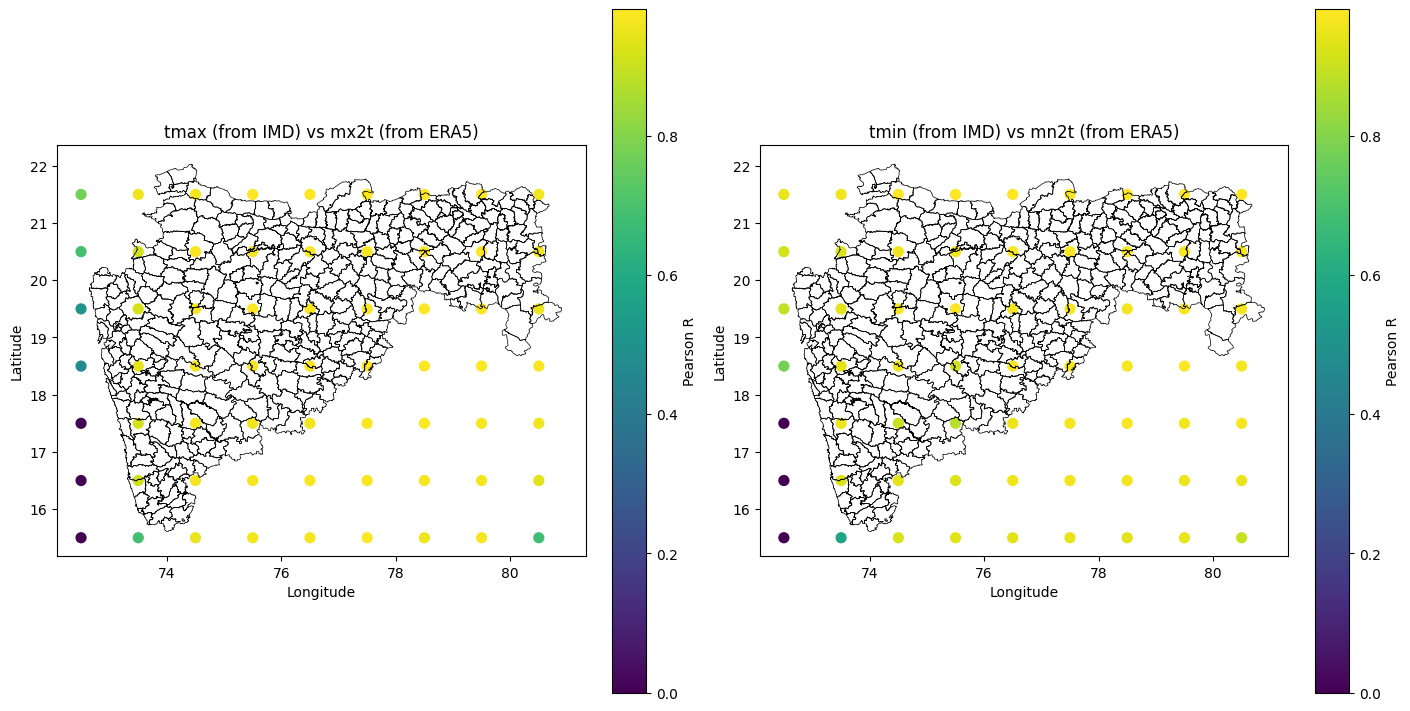

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

correlations[['tmax_corr', 'tmin_corr']] = correlations[['tmax_corr', 'tmin_corr']].fillna(0)

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(
    correlations,
    geometry=gpd.points_from_xy(correlations['longitude'], correlations['latitude']),
    crs="EPSG:4326"
)

# Load Maharashtra blocks GeoJSON
maha = gpd.read_file("https://maharashtra-blocks-geojson.netlify.app/maharashtra_blocks.geojson")

# Shared color limits
vmin = min(gdf[['tmax_corr', 'tmin_corr']].min())
vmax = max(gdf[['tmax_corr', 'tmin_corr']].max())

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 7), constrained_layout=True)

# Plot tmax_corr
maha.boundary.plot(ax=ax[0], color='black', linewidth=0.5)
sc1 = gdf.plot(
    ax=ax[0], column='tmax_corr', cmap='viridis', markersize=50, 
    vmin=vmin, vmax=vmax, legend=True, legend_kwds={'label': 'Pearson R'}
)
ax[0].set_title('tmax (from IMD) vs mx2t (from ERA5)')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

# Plot tmin_corr
maha.boundary.plot(ax=ax[1], color='black', linewidth=0.5)
sc2 = gdf.plot(
    ax=ax[1], column='tmin_corr', cmap='viridis', markersize=50, 
    vmin=vmin, vmax=vmax, legend=True, legend_kwds={'label': 'Pearson R'}
)
ax[1].set_title('tmin (from IMD) vs mn2t (from ERA5)')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

# Consistent aspect ratio
for a in ax:
    a.set_aspect('equal')

plt.show()


> As we can see in the plot above, the correlation between the two datasets is strong over the mainland and weak over the Arabian Sea.

In [51]:
correlations.to_csv('correlation_maha_2020_tmax_tmin.csv', index=False)